In [1]:
using CSV, DataFrames, Plots, GLM

In [2]:
# Read data from CSV file
pairCSV = CSV.read("50-samples.csv", DataFrame)

# Extract x and y values from CSV data
x_observed = pairCSV.x
y_observed = pairCSV.y

13-element Vector{Int64}:
   5
  12
  25
  44
  69
 100
 137
 180
 229
 284
 345
 412
 485

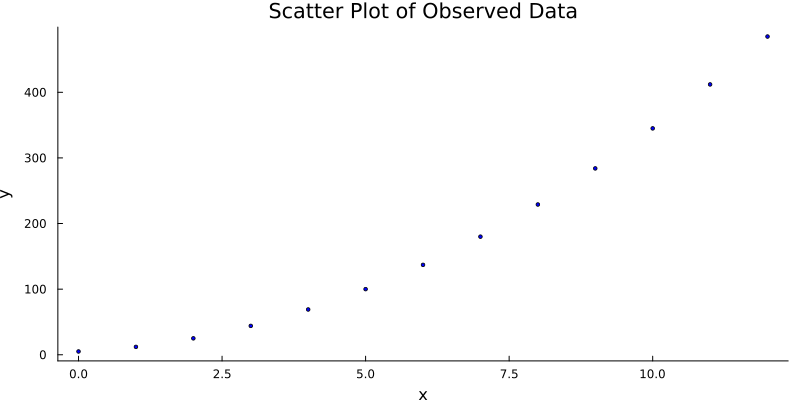

In [3]:
# Create a scatter plot of the observed data points
scatter_plot = scatter(
  x_observed, y_observed,
  xlabel = "x", ylabel = "y",
  title = "Scatter Plot of Observed Data",
  markersize = 2,
  legend = false,
  color = :blue,
  grid = false,
  size = (800, 400))

In [4]:
# Fit a linear model
model = lm(@formula(y ~ x), pairCSV)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────
(Intercept)  -61.0     21.2132  -2.88    0.0151   -107.69    -14.3101
x             40.0      3.0     13.33    <1e-07     33.397    46.603
─────────────────────────────────────────────────────────────────────

In [5]:
# Get coefficients
# Extract slope and intercept
coefs = coef(model)
m_slope = coefs[2]
b_intercept = coefs[1]

-61.00000000000011

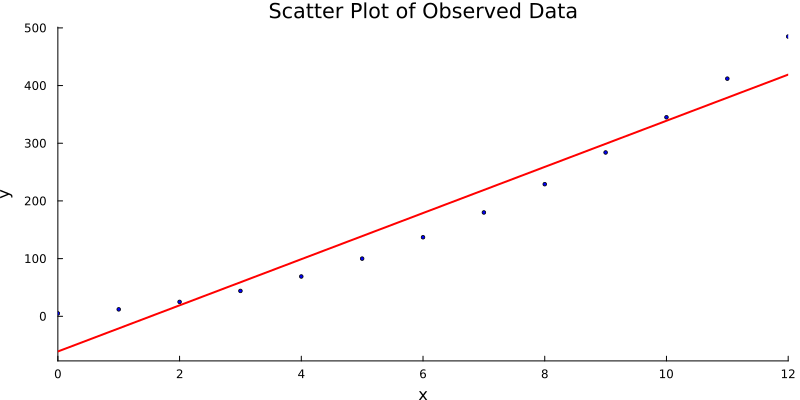

In [6]:
# Calculate regression line
regression_line = plot!(
  x -> m_slope * x + b_intercept,
  xlims = extrema(x_observed),
  color = :red, linewidth = 2)